<a href="https://colab.research.google.com/github/jcpalaciosb/Clasificacion_de_Precios/blob/main/Mobile_Price_Classification_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROYECTO 2

## Datos Personales

* **Nombre Completo**: Juan Carlos Palacios Banchero
* **ID Coding Dojo**: 81390
* **Track**: Machine Learning
* **Nombre del proyecto**: Mobile Price Classification
* **Parte Nro.**: 4


In [1]:
# montaje de librerias 
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# PARTE 1

Escoger el conjunto de datos de primera opción, y un conjunto de datos de reserva en caso de que el primero propuesto no se apruebe.  

Proponer dos conjuntos de datos que tengan cada uno un componente de aprendizaje supervisado. Pueden elegir un problema de regresión o clasificación para cada conjunto de datos propuesto.  

Crear un cuaderno de Colab donde hayan subido y mostrado el .head() de cada uno de los conjuntos de datos.  Para cada uno de los conjuntos de datos propuestos, respondan las siguientes preguntas:

1) Fuente de datos

2) Breve descripción de datos

3) ¿Cuál es el objetivo?

4) ¿Este es un problema de clasificación o regresión?

5) ¿Cuántas características hay?

6) ¿Cuántas filas de datos hay?

7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

## Solucion a Parte 1: 

1) Fuente de datos: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification)

**Contexto:**

Bob ha comenzado su propia empresa de telefonía móvil. 
Quiere dar una pelea dura a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de telefonía móvil no se puede simplemente asumir cosas. Para resolver este problema, recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere averiguar alguna relación entre las funciones de un teléfono móvil (p. ej., RAM, memoria interna, etc.) y su precio de venta. Pero no es tan bueno en Machine Learning. Así que necesita tu ayuda para resolver este problema.

En este problema, no tiene que predecir el precio real, sino un rango de precios que indica qué tan alto es el precio

2) Breve descripcion de datos: 

* Este conjunto de datos contiene información sobre muchos móviles y variables al respecto.

 * Descripcion de los datos:

| Name          | Description                                                        |
|---------------|--------------------------------------------------------------------|
| battery_power | Total energy a battery can store   in one time measured in mAh     |
| blue          | Has bluetooth or not                                               |
| clock_speed   | speed at which microprocessor   executes instructionS              |
| dual_sim      | Has dual sim support or not                                        |
| fc            | Front Camera mega pixels                                           |
| four_g        | Has 4G or not                                                      |
| int_memory    | Internal Memory in Gigabytes                                       |
| m_dep         | Mobile Depth in cm                                                 |
| mobile_wt     | Weight of mobile phone                                             |
| n_cores       | Number of cores of processor                                       |
| pc            | Primary Camera mega pixels                                         |
| px_height     | Pixel Resolution Height                                            |
| px_width      | Pixel Resolution Width                                             |
| ram           | Random Access Memory in   Megabytes                                |
| sc_h          | Screen Height of mobile in cm                                      |
| sc_w          | Screen Width of mobile in cm                                       |
| talk_time     | longest time that a single   battery charge will last when you are |
| three_g       | Has 3G or not                                                      |
| touch_screen  | Has touch screen or not                                            |
| wifi          | Has wifi or not                                                    |
| price_range   | Price Range                                                        |

In [2]:
# carga de datos train
filename="/content/train.csv"  # se lee solo la data del archivo train a que el test es solo para predecir los valores luego de aplicar el modelo
df = pd.read_csv(filename)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


3) Cual es el objetivo: 
* Utilizar la data arriba detallada para evaluar diferentes modelos de aprendizaje supervisado para elegir el mas adecuado que permita predecir un rango de precios que indica qué tan alto es el precio

4) ¿Este es un problema de clasificación o regresión? 

In [3]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

* Por las caracteristicas de la data del vector objetivo, tenemos un problema de clasificacion

5) ¿Cuántas características hay?

In [4]:
print(f"La cantidad de caracteristicas es: {len(df.keys())}") 
print(f"Las caracteristicas a trabajar son: {df.columns}")

La cantidad de caracteristicas es: 21
Las caracteristicas a trabajar son: Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


6) ¿Cuántas filas de datos hay?

In [5]:
filas=df.shape[0]
print(f"Hay un total de {filas} filas")

Hay un total de 2000 filas


7) ¿Qué retos, si es que hay alguno, prevén en la limpieza, exploración o modelización con este conjunto de datos?

In [6]:
# revision de duplicados:

In [7]:
df.columns.duplicated()   # revision en columnas

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [8]:
df.duplicated().sum()   # revision en filas

0

In [9]:
# revision de datos faltantes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

La data no presenta duplicados ni en columnas ni en filas y tampoco tiene datos faltantes. Habra que analizar la data innecesaria, la correlacion de las variables, determinacion de la variable objetivo y la normalizacion de los valores en su mayoria numerico. El reto prinicpal en esta etapa sera evaluar y seleccionar la data que mejor pueda ayudar a obtener una buena prediccion.

# PARTE 2

Al usar el conjunto de datos aprobado que propusieron para el proyecto 2, parte 1 la semana pasada, limpiarán y explorarán el conjunto de datos.  


Para cumplir con los requisitos para esta semana, deben haber:

 - eliminado las columnas innecesarias

 - eliminado las filas duplicadas

 - identificado y abordado los valores faltantes 

 - identificado y corregido las inconsistencias en los datos para los valores categóricos (es decir, Cat, cat, cats)
 
 - producido visuales univariantes para el objetivo y todas las características

 - identificado los valores atípicos

 - producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

 - comentado todos los pasos de limpieza y descrito todas las decisiones que tomaron. (Nota: durante la pila final del programa, harán una presentación para una audiencia técnica que incluirá sus decisiones y procesos en los pasos de limpieza. Entre más notas tomen ahora, más fácil será la presentación. Para clarificar, esa presentación NO se entrega ahora).

Deberían comenzar a trabajar en su EDA* en profundidad y a hacer visuales multivariantes para la próxima parte 3 de esta tarea una vez que hayan presentado todas las tareas y el examen de cinturón para esta pila.

Comprometan su archivo al repositorio Github y envíen el enlace abajo.

## Solucion a Parte 2: 

**Observacion**:

De lo resuelto en la parte 1, se tiene que no es necesario eliminar filas duplicadas dado que no existen y no se han encontrado valores faltantes, tampoco se presenta en la data valores categoricos que puedan tener alguna inconsistencia: sin embargo, se revisaran los valores unicos de cada columna numerica.

**a) Identificar los valores atípicos**

In [11]:
# Revision de los valores unicos de cada Categoria
caracteristicas=df.columns
for n in range(0, len(caracteristicas)):
  caracteristica=caracteristicas[n]
  unicos = df[caracteristica].unique()
  conteo = df[caracteristica].value_counts()
  print(f"Carateristica: {caracteristica}\n")
  print(f"Valores unicos: \n{unicos}\n")
#  print(f"Conteo de valores: \n{conteo}\n")

Carateristica: battery_power

Valores unicos: 
[ 842 1021  563 ... 1139 1467  858]

Carateristica: blue

Valores unicos: 
[0 1]

Carateristica: clock_speed

Valores unicos: 
[2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]

Carateristica: dual_sim

Valores unicos: 
[0 1]

Carateristica: fc

Valores unicos: 
[ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]

Carateristica: four_g

Valores unicos: 
[0 1]

Carateristica: int_memory

Valores unicos: 
[ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]

Carateristica: m_dep

Valores unicos: 
[0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]

Carateristica: mobile_wt

Valores unicos: 
[188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 1

In [12]:
df["sc_w"].value_counts()

1     210
3     199
4     182
0     180
5     161
2     156
7     132
6     130
8     125
10    107
9      97
11     84
12     68
13     49
14     33
15     31
16     29
17     19
18      8
Name: sc_w, dtype: int64

In [13]:
# revision de la data estadistica de cada variable
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [14]:
# carga de librerias adicionales a pandas para hacer visualizaciones
import seaborn as sns # visualizacion
import seaborn as sb # visualization
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
from matplotlib import cm
from matplotlib import colors


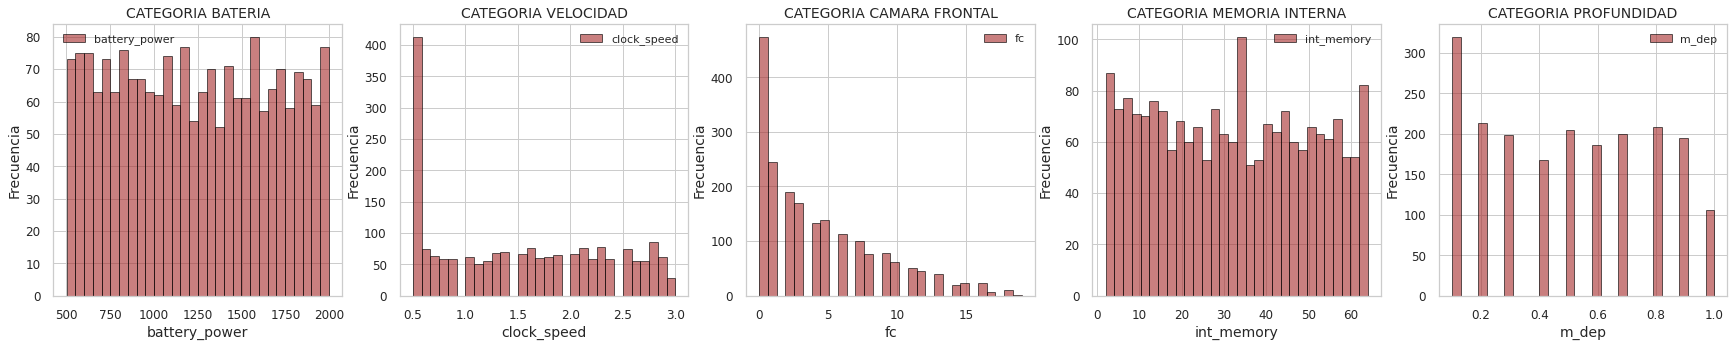

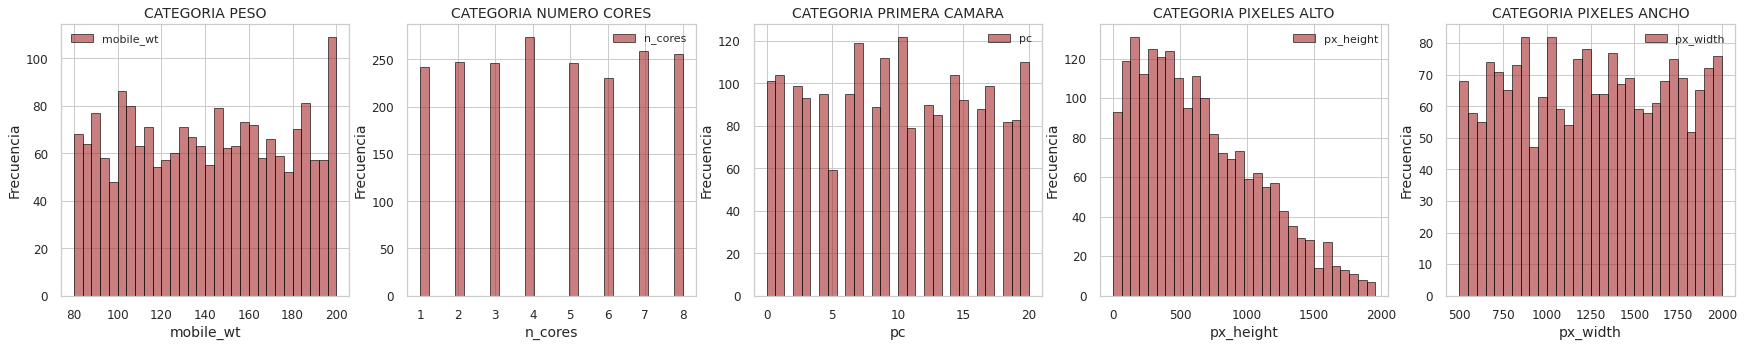

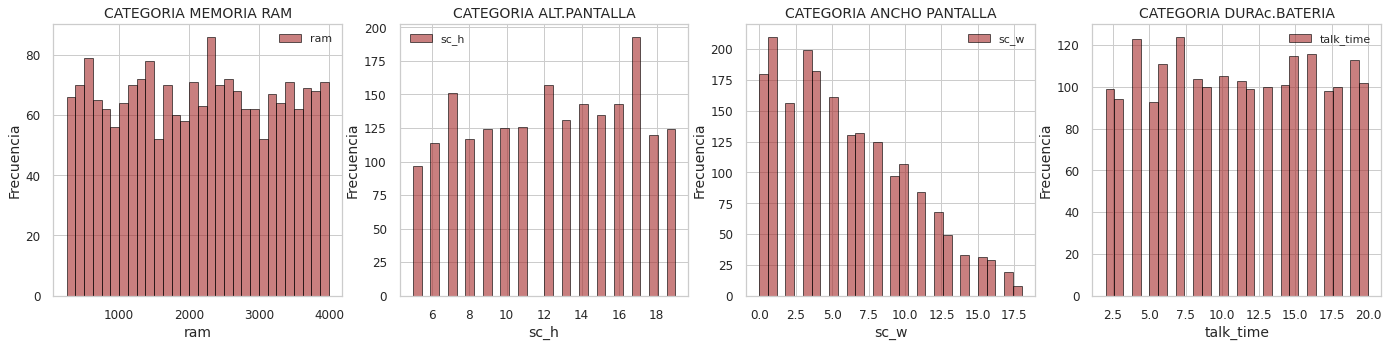

In [15]:
# Revision de la frecuencia de datos de las variables con gran cantidad de valores
lista=np.array(["battery_power",	"clock_speed", "fc",	"int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", "px_width","ram", "sc_h", "sc_w", "talk_time"])  # columnas a usar
Titulos=np.array(["BATERIA", "VELOCIDAD", "CAMARA FRONTAL", "MEMORIA INTERNA", "PROFUNDIDAD", "PESO", "NUMERO CORES", "PRIMERA CAMARA", 
                  "PIXELES ALTO", "PIXELES ANCHO", "MEMORIA RAM", "ALT.PANTALLA", "ANCHO PANTALLA", "DURAc.BATERIA"])  # columnas a usar para titulo
plt.style.use('seaborn')
sub=1
fig = plt.figure(figsize=(30, 5))
for x in range(0, len(lista)):
  if sub > 5:
     plt.show()
     sub = 1
     fig = plt.figure(figsize=(30, 5))
  sns.set_theme(style="whitegrid")
  plt.subplot(1, 5, sub)
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial
  variable="CATEGORIA "+Titulos[x]
  plt.title(variable, fontsize = 14)
  plt.xlabel(lista[x], fontsize = 14)     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia", fontsize = 14) # agrega sub-titulo al eje y
  plt.xticks(fontsize = 12, rotation = 0)
  plt.yticks(fontsize = 12)
  df.loc[:, lista[x]].hist(bins = 30, legend=" ", color = "brown", edgecolor='black', alpha=0.6)
  sub=sub+1

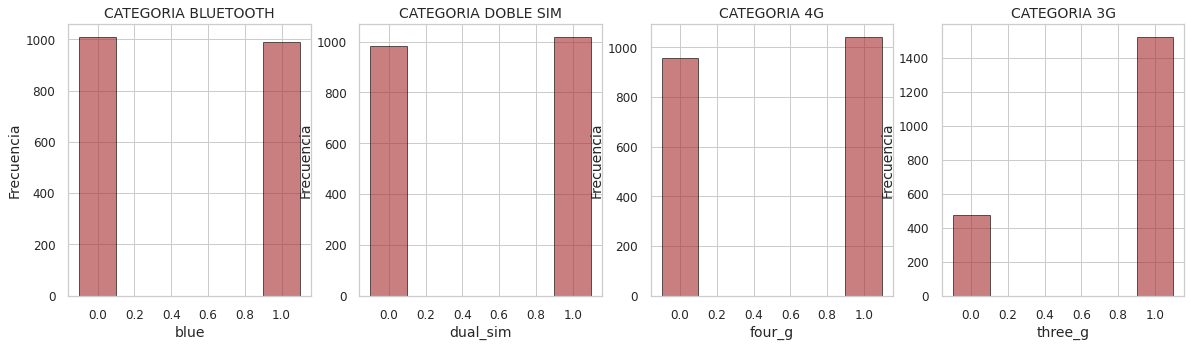

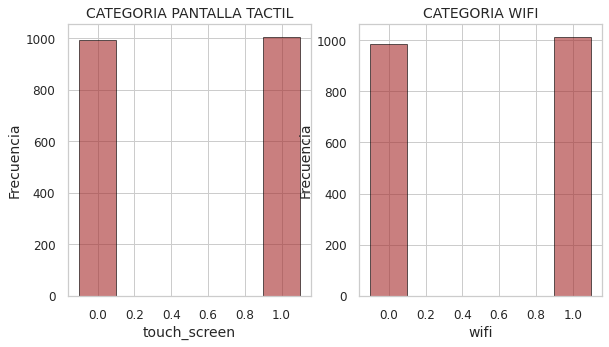

In [16]:
# Revision del las variables de pocos valores unicos
lista=np.array(["blue",	"dual_sim", "four_g",	"three_g", "touch_screen", "wifi"])  # columnas a usar
Titulos=np.array(["BLUETOOTH", "DOBLE SIM", "4G", "3G",	"PANTALLA TACTIL", "WIFI"])  # columnas a usar para titulo
plt.style.use('seaborn')
sub=1
fig = plt.figure(figsize=(20, 5))
for x in range(0, len(lista)):
  if sub > 4:
     plt.show()
     sub = 1
     fig = plt.figure(figsize=(20, 5))
  sns.set_theme(style="whitegrid")
  plt.subplot(1, 4, sub)
  plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial
  variable="CATEGORIA "+Titulos[x]
  plt.title(variable, fontsize = 14)
  plt.xlabel(lista[x], fontsize = 14)     # agrega sub-titulo al eje x
  plt.ylabel("Frecuencia", fontsize = 14) # agrega sub-titulo al eje y
  plt.xticks(fontsize = 12, rotation = 0)
  plt.yticks(fontsize = 12)
  dftemp=df.loc[:, lista[x]].value_counts()
  plt.bar(dftemp.index, dftemp.values, label=" ", color ='brown', edgecolor='black', alpha=0.6, width=0.2)
  sub=sub+1

**Observacion:**

De la revision de los datos unicos de cada caracteristica, su informacion estadistica, el histograma de cada variable de varios datos unicos y diagrama de barras de variables de pocos datos unicos, vemos que no hay valores atipicos ni inconsistencias. Se evidencias en los diagramas de barras variables numericas con valores binarios evidenciando un tiene o no tiene determinada caracteristica.

**b) producir un mapa de calor de correlación e identificar cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra**

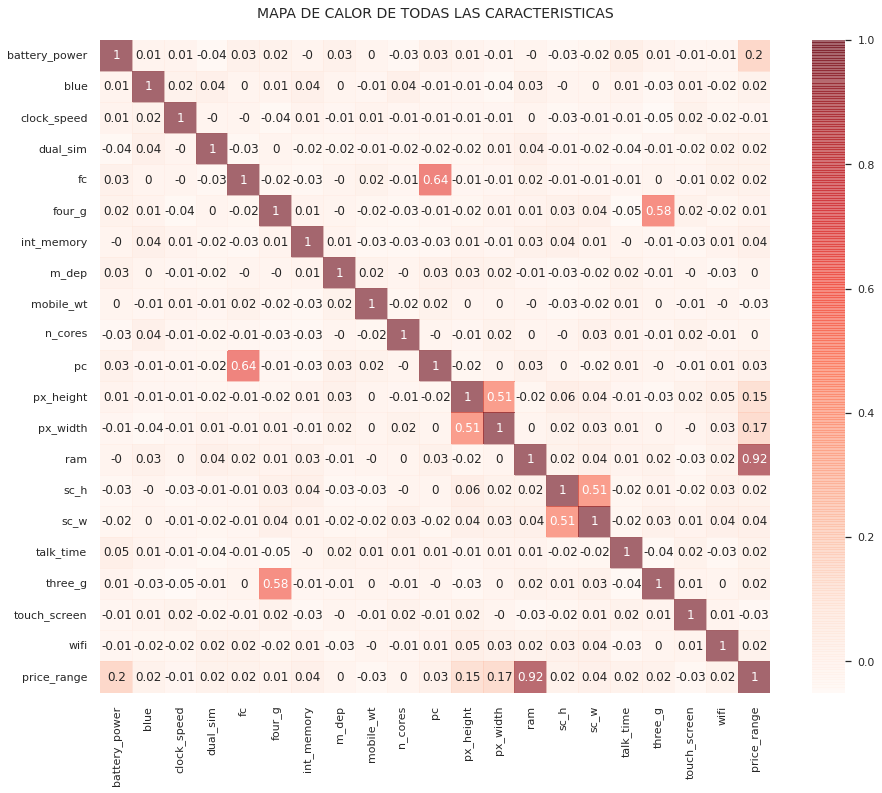

In [17]:
# Mapa de calor de la correlacion de las caracteristicas
corr = df.corr().round(2)
sns.set(rc = {'figure.figsize':(15,12)})
sns.set_theme(style="whitegrid")
plt.title("MAPA DE CALOR DE TODAS LAS CARACTERISTICAS"+"\n", fontsize = 14)
sns.heatmap(corr, cmap = 'Reds', annot = True, alpha=0.6)

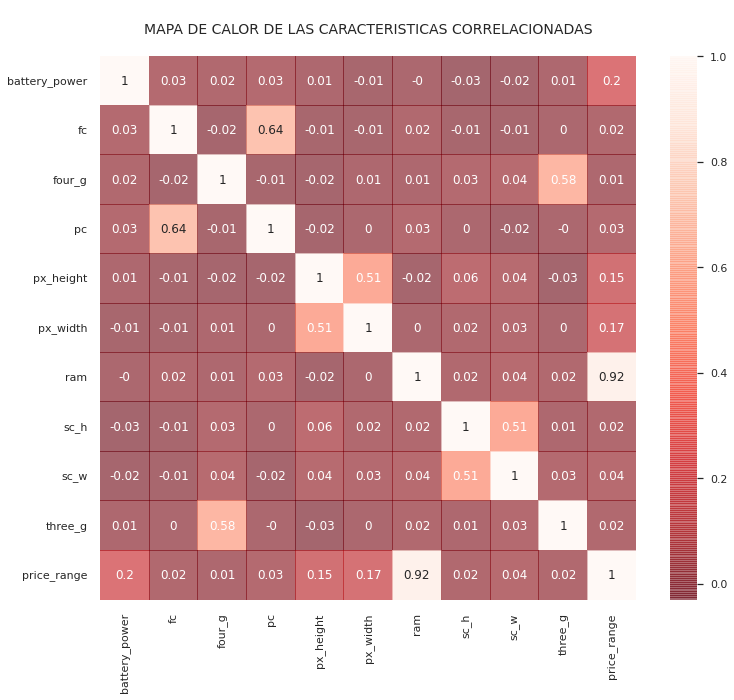

In [18]:
# Mapa de calor de la correlacion de las caracteristicas reducido a relevantes
df.drop(columns=["blue", "clock_speed", "dual_sim", "int_memory", "m_dep", "mobile_wt", "n_cores", "talk_time", "touch_screen", "wifi"], axis=1, inplace=True)
corr = df.corr().round(2)
sns.set(rc = {'figure.figsize':(12,10)})
sns.set_theme(style="whitegrid")
plt.title("\nMAPA DE CALOR DE LAS CARACTERISTICAS CORRELACIONADAS"+"\n", fontsize = 14)
sns.heatmap(corr, cmap = 'Reds_r', annot = True, alpha=0.6)

**Observacion**:

Del mapa de calor observamos lo siguiente:

 - Existe una correlacion alta entre las variables Camara Frontal y Primera Camara (fc y pc) con 0.64, 4G y 3G (four_g y three_g) con 0.58 y Altura de Pantalla y Ancho de Pantalla (sc_h y sc_w) con 0.51.
 - Existe una correlacion muy alta entre la variable de Memoria RAM (ram) y el vector objetivo Rango de Precios (price_range) con 0.92, lo cual parece indicar que la cantidad de memoria ram tiene mucha incidencia en el rango de precios.
 - Existe una correlacion baja entre las variables Bateria (battery_power) con el Rango de Precios (price_range) de 0.2 y de Altura de Pixeles (px_height) y Ancho de Pixeles  (px_width) con Rango de Precios (price_range) de 0.15 y 0.17. Se estan considerando en el analisis estas ultimas caracteristicas, por estar relacionadas con el vector objetivo a pesar de la baja correlacion

Mediante los siguientes codigos, se visualizara la concentracion de los datos de las categorias que tienen correlacion muy alta y baja con el vector objetivo y por otro lado, se visualizaran la concentracion de los datos las variables fc, pc, four_g, three_g, sc_h y sc_w respecto a la correlacion muy alta de la variable ram con el vector objetivo, para analizar si se incluyen en el conjunto de datos con los que se trabajaran los modelos.



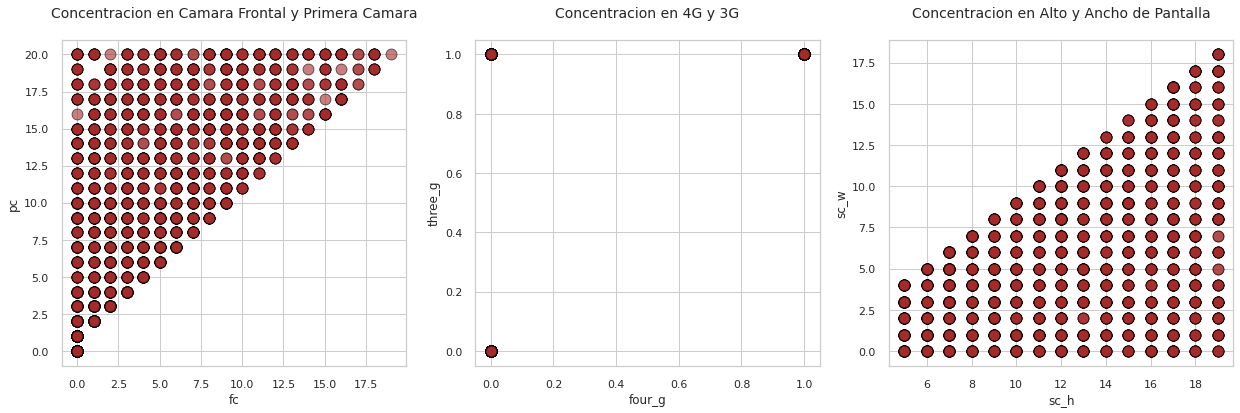

In [19]:
# Correlaciones altas entre las caracteristicas
plt.figure(figsize=(21,6))
# Subplot 1
plt.subplot(1, 3, 1);
plt.title('Concentracion en Camara Frontal y Primera Camara\n', fontsize = 14);
sns.scatterplot(data=df, x='fc', y='pc', color="brown", s=120, alpha=0.6, edgecolor="black");  
# Subplot 2
plt.subplot(1, 3, 2);
plt.title('Concentracion en 4G y 3G\n', fontsize = 14);
sns.scatterplot(data=df, x='four_g', y='three_g', color="brown", s=120, alpha=0.6, edgecolor="black");
# Subplot 
plt.subplot(1, 3, 3);
plt.title('Concentracion en Alto y Ancho de Pantalla\n', fontsize = 14);
sns.scatterplot(data=df, x='sc_h', y='sc_w', color="brown", s=120, alpha=0.6, edgecolor="black");
plt.show()

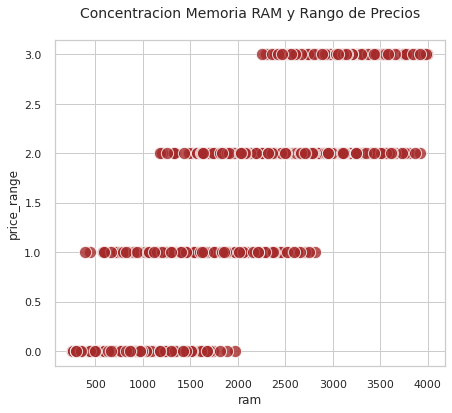

In [20]:
# Concentracion muy alta entre la caracteristica ram y vector objetivo price_range
plt.figure(figsize=(7,6))
plt.title('Concentracion Memoria RAM y Rango de Precios\n', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', color="brown", s=150, alpha=0.8, edgecolor="white");
plt.show()

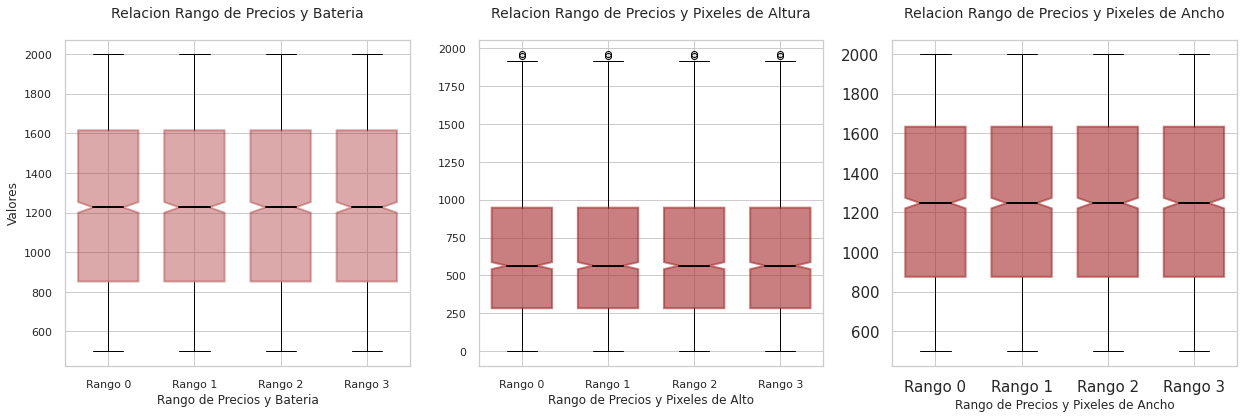

In [21]:
# Visualizacion de las herramientas estadisticas de las caracteristicas correlacionadas de manera baja con el vector objetivo (boxplots)
rango=list(range(4))
bateria=[0,0,0,0]
pixelh=[0,0,0,0]
pixelw=[0,0,0,0]
for i in range(0, len(rango)):
  mask=df['price_range']==i
  bateria[i]=df.loc[:,'battery_power']
  pixelh[i]=df.loc[:,'px_height']
  pixelw[i]=df.loc[:,'px_width']
fig, axes = plt.subplots(1,3, figsize = (21, 6))
# Subplot 1
axes[0].boxplot(bateria, notch=True, labels=["Rango 0","Rango 1", "Rango 2", "Rango 3"], widths=.7, patch_artist=True, medianprops=dict(linestyle='-', 
                linewidth=2, color='Black'), boxprops=dict(linestyle='--',linewidth=2, color='brown', facecolor='brown', alpha=0.4))
axes[0].set_title(f'Relacion Rango de Precios y Bateria\n', fontsize=14)
axes[0].set_xlabel('Rango de Precios y Bateria', fontsize=12)
axes[0].set_ylabel('Valores', fontsize=12)
# Subplot 2
axes[1].boxplot(pixelh, notch=True, labels=["Rango 0","Rango 1", "Rango 2", "Rango 3"], widths=.7, patch_artist=True, medianprops=dict(linestyle='-', 
                linewidth=2, color='Black'), boxprops=dict(linestyle='--',linewidth=2, color='brown', facecolor='brown', alpha=0.6))
axes[1].set_title(f'Relacion Rango de Precios y Pixeles de Altura\n', fontsize=14)
axes[1].set_xlabel('Rango de Precios y Pixeles de Alto')
axes[0].set_ylabel('Valores', fontsize=12)
# Subplot 
axes[2].boxplot(pixelw, notch=True, labels=["Rango 0","Rango 1", "Rango 2", "Rango 3"], widths=.7, patch_artist=True, medianprops=dict(linestyle='-', 
                linewidth=2, color='Black'), boxprops=dict(linestyle='--',linewidth=2, color='brown', facecolor='brown', alpha=0.6))
axes[2].set_title(f'Relacion Rango de Precios y Pixeles de Ancho\n', fontsize=14)
axes[2].set_xlabel('Rango de Precios y Pixeles de Ancho')
axes[0].set_ylabel('Valores', fontsize=12)  
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);
plt.show()

* Analizados los boxplots de la data de las caracteristicas con correlacion baja con la variable objetivo, vemos que la media de los datos es similar en cada rango, por lo que se usara este estadistico para efectos comparativos

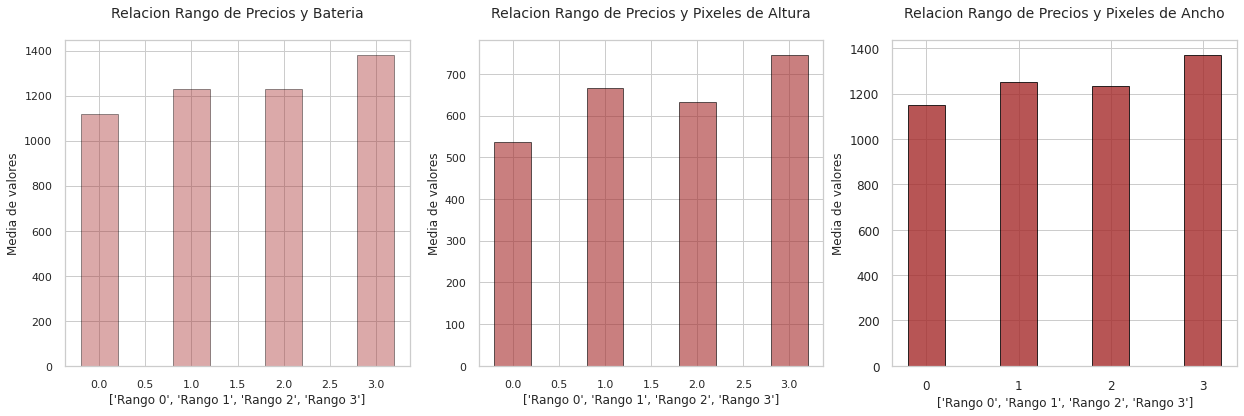

In [22]:
# Visualizacion de la media de valores de las caracteristicas correlacionadas de manera baja con el vector objetivo (graficos de barra)
rango=list(range(4))
rango_str=["Rango 0", "Rango 1", "Rango 2", "Rango 3"]
battery=df.groupby("price_range")["battery_power"].mean()
pxheight=df.groupby("price_range")["px_height"].mean()
pxwidth=df.groupby("price_range")["px_width"].mean()
fig, axes = plt.subplots(1,3, figsize = (21, 6))
# Subplot 1
axes[0].bar(rango, battery, color='brown', edgecolor='black', alpha=0.4, width=0.4)
axes[0].set_title(f'Relacion Rango de Precios y Bateria\n', fontsize=14)
axes[0].set_xlabel(rango_str) 
axes[0].set_ylabel('Media de valores')
plt.xticks(rango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
# Subplot 2
axes[1].bar(rango, pxheight, color='brown', edgecolor='black', alpha=0.6, width=0.4)
axes[1].set_title(f'Relacion Rango de Precios y Pixeles de Altura\n', fontsize=14)
axes[1].set_xlabel(rango_str)  
axes[1].set_ylabel('Media de valores')
plt.xticks(rango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
# Subplot 
axes[2].bar(rango, pxwidth, color='brown', edgecolor='black', alpha=0.8, width=0.4)
axes[2].set_title(f'Relacion Rango de Precios y Pixeles de Ancho\n', fontsize=14)
axes[2].set_xlabel(rango_str) 
axes[2].set_ylabel('Media de valores')
plt.xticks(rango, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.show()

* Del los diagramas de barra se observa cierta diferenciacion en el rango de precios por la medida de los valores de las respectivas caracteristicas, se analizara este tipo de grafico mas adelante con cada una de las caracteristicas

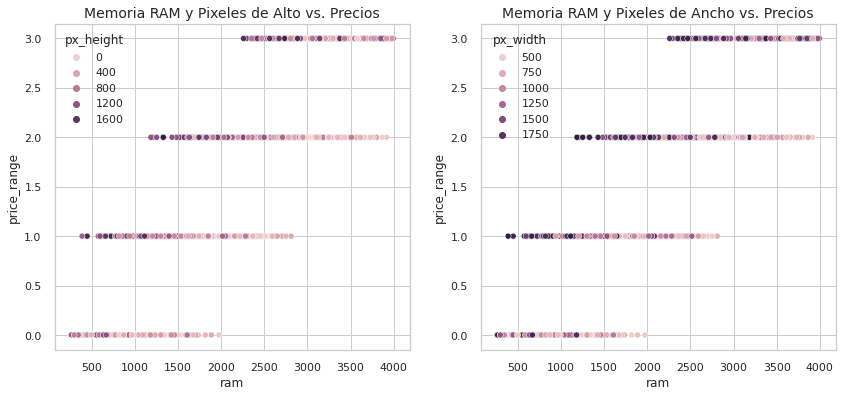

In [23]:
# Memoria RAM, Pixeles de alto y ancho vs. Precios
plt.figure(figsize=(14,6))
# Subplot 1
plt.subplot(1, 2, 1);
plt.title('Memoria RAM y Pixeles de Alto vs. Precios', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', hue="px_height");
# Subplot 2
plt.subplot(1, 2, 2);
plt.title('Memoria RAM y Pixeles de Ancho vs. Precios', fontsize = 14);
sns.scatterplot(data=df, x='ram', y='price_range', hue="px_width");
plt.show()

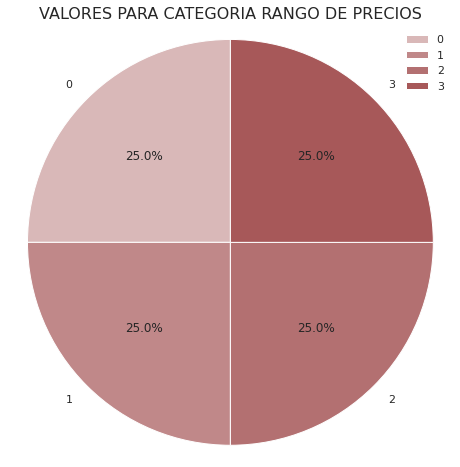

In [24]:
# visualizacion del Reparto de Valores de price_range
valor = df['price_range'].unique()
valor_s=sorted(valor)
cantidades = df['price_range'].value_counts()
colores = ["#D9B8B8", "#C08889", "#B37071", "#A75859"]
explode = (0, 0, 0, 0) 
fig1, ax1 = plt.subplots(figsize=(8, 8))
plt.title('VALORES PARA CATEGORIA RANGO DE PRECIOS', fontsize = 16);
ax1.pie(cantidades, explode=explode, labels=valor_s, autopct='%1.1f%%', shadow=False, startangle=90, colors = colores)
ax1.axis('equal') 
plt.legend(valor_s)
plt.show()

**Observacion**:

Los graficos muestran la concentracion de la data en los rangos de precios correspondientes a los valores de Memoria Ram. Se han visualizado todas las caracteristicas que guardan una correlacion y dado su existencia, se trabajara con todas esas caracteristicas, eliminando todas aquella que no han presentado correlacion alguna.

Por otro lado, revisados los valores del vector objetivo y sus cantidades, se encuentra que esta perfectamente balanceado para determinar cada uno de los rangos de precios

**c) Analisis de la influencia de las caracteristicas seleccionadas en cada rango de precios**

In [25]:
# Agrupamiento del dataframe por rango de precios y media de valores de mayor frecuencia de las demas caracteristicas
precios_groups = df.groupby('price_range', as_index=False).mean().round(2) # as_index=False para que rango de precios sea una columna y no un indice
precios_groups

,price_range,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,0,1116.90,4.08,0.52,9.57,536.41,1150.27,785.31,12.32,5.68,0.75
1,1,1228.87,4.34,0.52,9.92,666.89,1251.91,1679.49,12.21,5.54,0.76
2,2,1228.32,4.50,0.49,10.02,632.28,1234.05,2582.82,12.01,5.71,0.77
3,3,1379.98,4.32,0.55,10.15,744.85,1369.84,3449.23,12.68,6.13,0.77


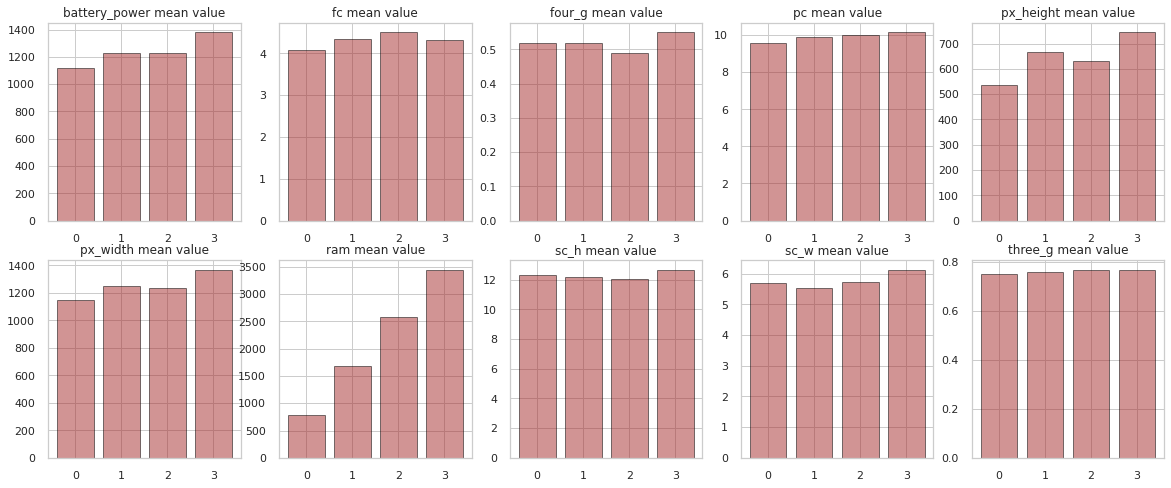

In [26]:
# Visualizacion de los valores medios 
fig, axes = plt.subplots(2,5, figsize = (20, 8))
axes = axes.ravel() # redimension de la matriz de impresion a un un vector 20, 1
# bucle para graficar cada columna en una figura
for i, col in enumerate(precios_groups.columns[1:]):
  axes[i].bar(precios_groups['price_range'], precios_groups[col], color='brown', edgecolor='black', alpha=0.5)
  axes[i].set_title(f'{col} mean value')

**Observacion**:

Los graficos muestran la influencia de cada caracteristica seleccionada en el rango de precios, que coinciden con la correlacion encontrada en el mapa de calor. Encontrandose lo siguiente:

- Con respecto a las caracteristicas internas, hay cierta diferenciacion con relacion a la bateria, pero una marcada diferencia con relacion a la memoria RAM, evidenciando que a mas memoria RAM, mayor el rango de precio.

- Del resto de carateristicas, casi no hay preferencia en ninguna de las caracteristicas externas de los equipos a excepcion de los pixeles alto y ancho.


**d) Eliminacion de las columnas innecesarias**

* De analisis, evaluacion y visualizacion de los datos mostrados, se considera conveniente trabajar unicamente con las caracteirsticas que han mostrado tener correlacion: es decir las siguientes:

 - Bateria (battery_power)
 - Camara Frontal (fc)
 - 4G (four_g)
 - Primera Camara (pc)
 - Altura de Pixeles (px_height)
 - Anchio de Pixeles (px_width)
 - Memoria RAM (ram)
 - Altura de Pantalla (sc_h) 
 - Ancho de Pantalla (sc_w) 
 - 3G (three_g)
 - **Rango de Precios (price_range)** (vector objetivo)

 * Las caracteristicas a eliminar son: 'blue', 'clock_speed', 'dual_sim', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'talk_time', 'touch_screen', 'wifi'



## Conclusiones a Parte 2

* La data trabajada cuenta con 2000 observaciones y 21 características de tipo numérico y no presenta duplicados en filas o en columnas, ni valores nulos.

* La variable objetivo “Rango de Precios”, esta compuesta por cuatro grupos enumerados del 0 al 3 y contiene información balanceada para cada uno de estos cuatro grupos con 500 observaciones para cada uno.

* De las otras 20 categorías, algunas tienen una distribución de frecuencia normal y otras sesgada hacia la derecha dado que son valores positivos. De estas 20 categorías 6 son binarias que representan un tiene o no tiene la característica.

* El Mapa de Calor mostro 11 categorías que guardan alguna correlación entre ellas: 

 * Respecto a la variable objetivo, existe una correlación muy alta entre la variable de Memoria RAM y una correlación baja con las variables Batería, Pixeles de Alto y Pixeles de Ancho, lo cual parece indicar que la cantidad de memoria ram tiene mucha incidencia en el rango de precios.

 * Se analizaron los valores de mayor frecuecia de cada una de las caracteristica seleecionadas en el mapa de calor y se evidencia  que  con respecto a las caracteristicas internas, hay cierta diferenciacion con relacion a la bateria, pero una marcada diferencia con relacion a la memoria RAM, evidenciando que a mas memoria RAM, mayor el rango de precio.

 * Se han visualizado todas las características que guardan una correlación y dado su existencia, se trabajara con todas esas características, eliminando todas aquella que no han presentado correlación alguna.

# PARTE 3

Para esta parte del proyecto, crea una video presentación de 5-10 minutos con diapositivas que esté diseñada para una audiencia TÉCNICA que aborde tu presentación de datos y el análisis exploratorio para tu conjunto de datos seleccionado. 

## Solucion a Parte 3

**Ver: [Proyecto 2 - Analisis Exploratorio](https://github.com/jcpalaciosb/Clasificacion_de_Precios/blob/main/Proyecto%202%20-%20Analisis%20Exploratorio.pptx)**

# PARTE 4

Ahora estás entrando a la fase de desarrollo del modelo del proyecto!

* Garantiza que completes los pasos de preprocesamiento adecuados
* Intenta múltiples modelos y afina los hiperparámetros de cada modelo para optimizar el rendimiento del modelo (incluye todos los modelos e hiperparámetros probados además del modelo final)
* Evalúa el rendimiento del modelo con las métricas adecuados para el modelo
* Elije tu modelo de “producción” y justifica esta decisión
* Vuelve a revisar tu código y garantiza que has proporcionados comentarios claros (recuerda que esto es para tu portafolio)

## Solucion a Parte 4

* **Seleccion de columnas y aplicacion de transformadores**:
 * Se seleccionaran las columnas para la matriz de características (X) y para el
vector objetivo (y) y se aplicaran los transformadores necesarios a las columnas

In [27]:
# carga de librerias adicionales a pandas para hacer las visualizaciones
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
df.head() # revision del dataframe

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g,price_range
0,842,1,0,2,20,756,2549,9,7,0,1
1,1021,0,1,6,905,1988,2631,17,3,1,2
2,563,2,1,6,1263,1716,2603,11,2,1,2
3,615,0,0,9,1216,1786,2769,16,8,1,2
4,1821,13,1,14,1208,1212,1411,8,2,1,1


In [29]:
# Matriz de caracteristicas y vector objetivo
y = df['price_range']
X = df.drop(columns = ['price_range'])

In [30]:
# Division de los datos en grupos de entrenamiento y de prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state = 42) 

In [31]:
# Impresion del numero de filas para los sets de entrenamiento y prueba
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set : ',len(X_train))
print('numero de filas test set : ',len(X_test))

Separando informacion:

numero de filas data original :  2000
numero de filas train set :  400
numero de filas test set :  1600


* por la cantidad de datos se usara el 20% de datos como test

In [32]:
# Escalamiento de las variables numericas
# instacion de escalador
scaler = StandardScaler()
# ajuste del escalador en los datos de entrenamiento
scaler.fit(X_train)

StandardScaler()

In [33]:
# transformacion de los datos de entrenamiento
train_scaled = scaler.transform(X_train)
# transformacion de los datos de prueba
test_scaled = scaler.transform(X_test)
print(f"{train_scaled[:5]}\n\n{test_scaled[:5]}")   # revision de las primeras 5 filas

[[-1.36503     0.4691616   0.89543386 -0.4690535   0.97392059  1.50650429
  -0.03745011  0.71678573 -0.12288636  0.54267705]
 [ 0.10086035 -0.90399431  0.89543386 -1.31116034 -1.19205349 -0.09883745
  -1.49517785 -0.26848675 -1.11091742  0.54267705]
 [-0.96141118  0.4691616   0.89543386  0.70989606 -1.18740048 -1.36935077
  -1.0924102  -1.50007736 -0.12288636  0.54267705]
 [ 0.79721371 -0.67513499  0.89543386 -0.80589624  0.76453534  0.92858126
   0.92045753 -0.26848675  0.1241214   0.54267705]
 [-1.67550602  0.69802092  0.89543386  1.55200289 -0.19863681 -1.43815113
   1.63088144  0.96310385 -1.11091742  0.54267705]]

[[ 0.82382595 -0.21741635  0.89543386 -0.80589624 -0.98732125  0.77034044
  -1.35542233 -1.00744111  0.1241214   0.54267705]
 [-0.2051803   0.69802092  0.89543386  1.04673879 -0.83842507 -0.65612037
   0.46625208  1.70205821  2.84120682  0.54267705]
 [ 1.54679154  1.15573956 -1.11677706  1.38358152 -0.79654802 -0.73409411
  -0.74399192 -1.00744111 -1.11091742  0.54267705

* Dado que se requerira esta informacion como un dataframe para los modelos, se convertira en un nuevo dataframe llamado X_train_scaled

In [34]:
# transformacion a un DataFrame del X_train
X_train_scaled = pd.DataFrame(train_scaled, columns=X_train.columns)
X_train_scaled.head()

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,-1.365030,0.469162,0.895434,-0.469054,0.973921,1.506504,-0.037450,0.716786,-0.122886,0.542677
1,0.100860,-0.903994,0.895434,-1.311160,-1.192053,-0.098837,-1.495178,-0.268487,-1.110917,0.542677
2,-0.961411,0.469162,0.895434,0.709896,-1.187400,-1.369351,-1.092410,-1.500077,-0.122886,0.542677
3,0.797214,-0.675135,0.895434,-0.805896,0.764535,0.928581,0.920458,-0.268487,0.124121,0.542677
4,-1.675506,0.698021,0.895434,1.552003,-0.198637,-1.438151,1.630881,0.963104,-1.110917,0.542677


In [35]:
# transformacion a un DataFrame del X_test
X_test_scaled = pd.DataFrame(test_scaled, columns=X_test.columns)
X_test_scaled.head()

,battery_power,fc,four_g,pc,px_height,px_width,ram,sc_h,sc_w,three_g
0,0.823826,-0.217416,0.895434,-0.805896,-0.987321,0.770340,-1.355422,-1.007441,0.124121,0.542677
1,-0.205180,0.698021,0.895434,1.046739,-0.838425,-0.656120,0.466252,1.702058,2.841207,0.542677
2,1.546792,1.155740,-1.116777,1.383582,-0.796548,-0.734094,-0.743992,-1.007441,-1.110917,0.542677
3,-0.633194,0.011443,-1.116777,1.552003,-0.882629,0.279565,1.756079,1.455740,0.371129,0.542677
4,-1.462608,0.698021,-1.116777,-0.300632,0.897146,1.573011,-0.171382,0.470468,-0.122886,0.542677


* Los datos originales estaban en diferentes escalas. La magnitud del valor ahora representa qué tan lejos está cada valor a partir de la media de
cada característica, en unidades de desviación estándar. Los valores que están más cerca de la media estarán más cercanos a cero. 

* **Seleccion de modelos**: 
 * Seleccion de cuatro modelos de clasificacion para determinar aquel que nos da las mejores metricas de resultados.

    a) Modelo de Clasificacion de Arbol de Decision

    b) Modelo de Clasificacion Bagged Tree
 
    c) Modelo de Clasificacion KNN
 
    d) Modelo de Regresion Logistica

In [36]:
# Revision de datos de los sets con los que se va a trabajar

In [37]:
X_train_scaled.info() # data de entrenamiento

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  400 non-null    float64
 1   fc             400 non-null    float64
 2   four_g         400 non-null    float64
 3   pc             400 non-null    float64
 4   px_height      400 non-null    float64
 5   px_width       400 non-null    float64
 6   ram            400 non-null    float64
 7   sc_h           400 non-null    float64
 8   sc_w           400 non-null    float64
 9   three_g        400 non-null    float64
dtypes: float64(10)
memory usage: 31.4 KB


In [38]:
X_test_scaled.info()  # data de prueba

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   float64
 1   fc             1600 non-null   float64
 2   four_g         1600 non-null   float64
 3   pc             1600 non-null   float64
 4   px_height      1600 non-null   float64
 5   px_width       1600 non-null   float64
 6   ram            1600 non-null   float64
 7   sc_h           1600 non-null   float64
 8   sc_w           1600 non-null   float64
 9   three_g        1600 non-null   float64
dtypes: float64(10)
memory usage: 125.1 KB


In [39]:
y_train.value_counts()   # data de entrenamiento

1    105
2    103
3     97
0     95
Name: price_range, dtype: int64

In [40]:
y_test.value_counts()  # data de prueba

0    405
3    403
2    397
1    395
Name: price_range, dtype: int64

In [41]:
# carga de librerias adicionales para los modelos a probar
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, accuracy_score, recall_score,precision_score, confusion_matrix, classification_report

### Opcion a) Modelo de Clasificacion Arbol de Decision

In [42]:
# instanciamiento del modelo
Tree_Class = DecisionTreeClassifier(random_state = 42)

In [43]:
# ajuste del modelo usando los datos de entrenamiento
Tree_Class.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# prediccion de los datos del modelo
train_preds = Tree_Class.predict(X_train_scaled)
test_preds = Tree_Class.predict(X_test_scaled)

In [45]:
# Evaluar el modelo
train_score = Tree_Class.score(X_train_scaled, y_train)
test_score = Tree_Class.score(X_test_scaled, y_test)
print(train_score)
print(test_score)

1.0
0.7775


* los coeficientes de determinacion para este modelo han resultado muy bueno para el caso de las variables de entrenamiento mas no de las de prueba que se encuentran alejados, eso significa que el modelo sobreajustado y se realizara el ajuste necesario.

* A continuacion se haran los ajustes del hiperparametro max_depth para ver si algo se mejora

In [46]:
# ¿Cuál era la profundidad del árbol aplicado por defecto (max_depth)?
Tree_Class.get_depth()

8

In [47]:
# Lista de valores a probar para max_depth:
max_depth_range = list(range(1, 17)) # se probara con este rango del doble de profundidad
# Lista para almacenar la puntuación para cada valor de max_depth:
train_scores = []
test_scores = []
for depth in max_depth_range:
  Tree_Class = DecisionTreeClassifier(max_depth = depth, random_state = 42) # Instanciemiento del modelo
  Tree_Class.fit(X_train_scaled, y_train) # ajuste usando las variables de entrenamiento
  # acumulacion de los valores obtenido para entrenamiento y prueba
  train_scores.append(Tree_Class.score(X_train_scaled, y_train))
  test_scores.append(Tree_Class.score(X_test_scaled, y_test))

In [48]:
# Reserva de valores en un dataframe de scores
scores=pd.DataFrame()
scores["train_scores"]=list(train_scores)
scores["test_scores"]=list(test_scores)

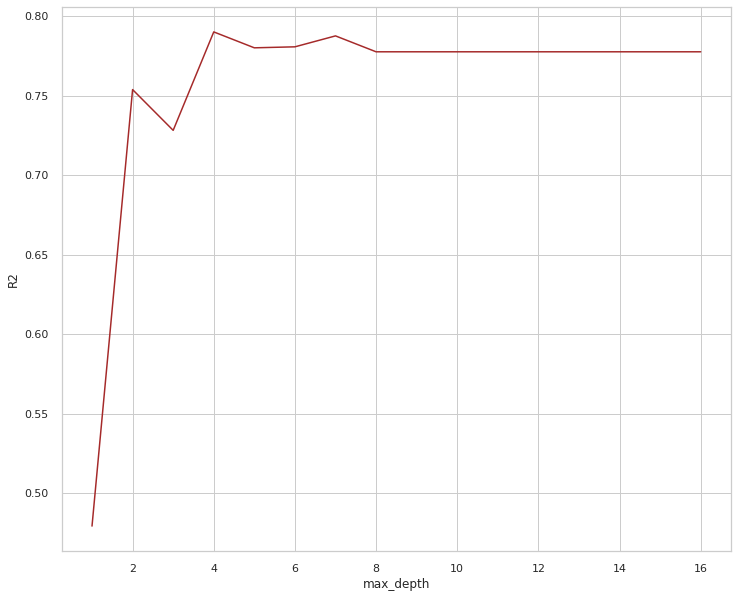

In [49]:
# Visualizacion del valor optimode max_depth para llevar a una puntuación R2 más alta
plt.plot(max_depth_range, test_scores, color="Brown")
plt.xlabel('max_depth')
plt.ylabel('R2');

In [50]:
# Revisamos los scores
scores

,train_scores,test_scores
0,0.4975,0.479375
1,0.7325,0.753750
2,0.7950,0.728125
3,0.8650,0.790000
4,0.9275,0.780000
5,0.9650,0.780625
6,0.9875,0.787500
7,1.0000,0.777500
8,1.0000,0.777500
9,1.0000,0.777500


* Se evidencia que el mejor resultado se obtuvo con el cuarto, por lo que 
se tomara el valor de 4 como profundidad maxima para el arbol

In [51]:
# obtencion de los variables y-test y y_pred para el mejor resultado
Tree_Class = DecisionTreeClassifier(max_depth = 4, random_state = 42) # Instanciamiento del modelo
Tree_Class.fit(X_train_scaled, y_train) # ajuste usando las variables de entrenamiento
Tree_y_true = list(y_test) # lista de valores reales para el modelo Tree
Tree_y_pred = list(Tree_Class.predict(X_test_scaled)) # lista de valores predichos

In [52]:
# suma de aciertos y desaciertos
boleano=[]
cant_valores=len(Tree_y_true)
for i in range (0, cant_valores):
  boleano.append(Tree_y_true[i] == Tree_y_pred[i])
boleano_array=np.array(boleano)
aciertos=round(np.sum(boleano_array==True, axis=0)/cant_valores*100,1)
desaciertos=round(100-aciertos,1)

In [53]:
# acumulacion de resultados para la comparativa final
Resultados=pd.DataFrame(columns=["Modelo", "Parametro", "Numero", "Training Accuracy", "Test Accuracy", "Aciertos", "Desaciertos"], index=range(4))
Resultados["Modelo"][0]="Decission Tree"
Resultados["Parametro"][0]="max_depth"
Resultados["Numero"][0]=4
Resultados["Training Accuracy"][0]="0.87"
Resultados["Test Accuracy"][0]="0.80"
Resultados["Aciertos"][0]=str(aciertos)+"%"
Resultados["Desaciertos"][0]=str(desaciertos)+"%"

### Opcion b) Modelo de Clasificacion Bagged Tree

In [54]:
# instanciamiento del modelo
Bag_Class = BaggingClassifier(random_state = 42)

In [55]:
# ajuste del modelo usando los datos de entrenamiento
Bag_Class.fit(X_train_scaled, y_train)

BaggingClassifier(random_state=42)

In [56]:
# prediccion de los datos del modelo
train_preds = Bag_Class.predict(X_train_scaled)
test_preds = Bag_Class.predict(X_test_scaled)

In [57]:
# Evaluar el modelo
train_score = Bag_Class.score(X_train_scaled, y_train)
test_score = Bag_Class.score(X_test_scaled, y_test)
print(train_score)
print(test_score)

1.0
0.843125


* los coeficientes de determinacion para este modelo han resultado muy buenos tambien, mostrando un valor mas cercano entre los datos de entrenamiento y los de prueba. Sin embargo, se buscara un ajuste y se analizara mas adelante las metricas correspondientes con los otros modelos a trabajar.

* A continuacion se haran los ajustes de numero de estimadores del hiperparametro para ver si algo se mejora


In [58]:
# ¿Cuáles fueron los hiperparametros por defecto?
Bag_Class.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [59]:
# Lista de valores a probar para n_estimators:
n_estimators_range = list(range(1, 11)) # se buscara desde 1 hasta 10 el numero n_estimadores del hiperparametro
# Lista para almacenar la puntuación para cada valor de n-estimators
train_scores = []
test_scores = []
for estimators in n_estimators_range:
  bag_class = BaggingClassifier(n_estimators = estimators, random_state = 42) # Instanciamiento del modelo
  bag_class.fit(X_train_scaled, y_train) # ajuste usando las variables de entrenamiento
  train_scores.append(Bag_Class.score(X_train_scaled, y_train))
  test_scores.append(Bag_Class.score(X_test_scaled, y_test))

In [60]:
# Reserva de valores en un dataframe de scores
scores=pd.DataFrame()
scores["train_scores"]=list(train_scores)
scores["test_scores"]=list(test_scores)

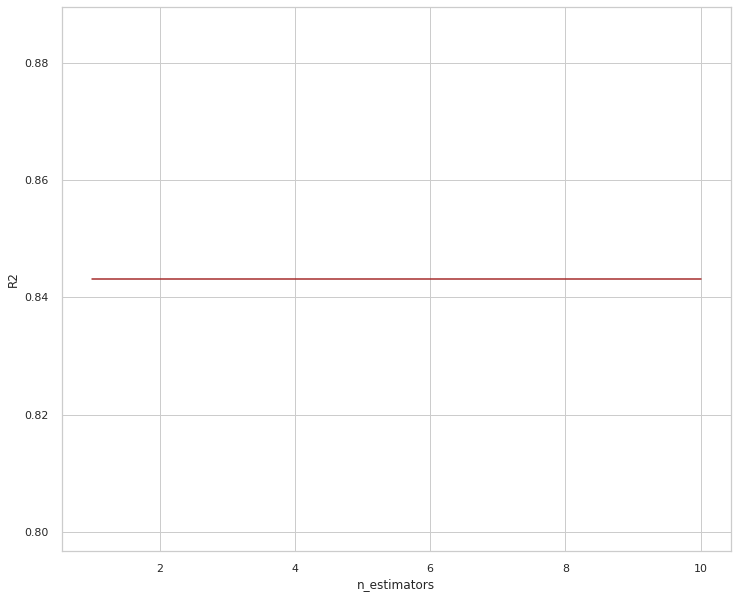

In [61]:
# Visualizacion del valor optimo de arboles estimadores para llevar a una puntuación R2 más alta
plt.plot(n_estimators_range, test_scores, color = "Brown")
plt.xlabel('n_estimators')
plt.ylabel('R2');

In [62]:
# Revisamos los scores
scores

,train_scores,test_scores
0,1.0,0.843125
1,1.0,0.843125
2,1.0,0.843125
3,1.0,0.843125
4,1.0,0.843125
5,1.0,0.843125
6,1.0,0.843125
7,1.0,0.843125
8,1.0,0.843125
9,1.0,0.843125


* Este grafico esta mostrando que para cualquiera sea el numero de estimadores, el coeficiente de determinacion para los datos de prueba son 0.84, estando erlativamente alejados del de los datos de entrenamiento. Se evaluaran las metricas al final para una mejor determinacion.

In [63]:
# obtencion de los variables y-test y y_pred para el mejor resultado
Bagg_Class = BaggingClassifier(n_estimators = 1, random_state = 42) # Instanciamiento del modelo
Bagg_Class.fit(X_train_scaled, y_train) # ajuste usando las variables de entrenamiento
Bagg_y_true = list(y_test) # lista de valores reales para el modelo Tree
Bagg_y_pred = list(Bagg_Class.predict(X_test_scaled)) # lista de valores predichos

In [64]:
# suma de aciertos y desaciertos
boleano=[]
cant_valores=len(Bagg_y_true)
for i in range (0, cant_valores):
  boleano.append(Bagg_y_true[i] == Bagg_y_pred[i])
boleano_array=np.array(boleano)
aciertos=round(np.sum(boleano_array==True, axis=0)/cant_valores*100,1)
desaciertos=round(100-aciertos,1)

In [65]:
# acumulacion de resultados para la comparativa final
Resultados["Modelo"][1]="Bagged Tree"
Resultados["Parametro"][1]="n_estimators"
Resultados["Numero"][1]=10 # hiperparametro por defecto
Resultados["Training Accuracy"][1]="1.00"
Resultados["Test Accuracy"][1]="0.84"
Resultados["Aciertos"][1]=str(aciertos)+"%"
Resultados["Desaciertos"][1]=str(desaciertos)+"%"

### Opcion c) Modelo de Clasificacion KNN

In [66]:
# instanciamiento del modelo
Knn_Class = KNeighborsClassifier(n_neighbors=1)

In [67]:
scaler = StandardScaler()
Knn_pipe = make_pipeline(scaler, Knn_Class)

In [68]:
# ajuste del modelo usando los datos de entrenamiento
Knn_pipe.fit(X_train, y_train) # en este modelo no uso los valores escalados porque se re escalaran con un pipeline 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

**Nota**:

Ya que se requiere hacer una escalamento previo con un pipeline, se esta usando para este modelo la serie X_train original

In [69]:
# prediccion de los datos del modelo
train_preds = Knn_pipe.predict(X_train)
test_preds = Knn_pipe.predict(X_test)

In [70]:
# Evaluar el modelo
train_score = Knn_pipe.score(X_train, y_train)
test_score = Knn_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

1.0
0.566875


* los coeficientes de determinacion para este modelo han resultado muy bueno para las variables de prueba mas no para las de entrenamiento lo que significa que esta sobreajustado. Se realizara el ajuste en los hiperparametros y se revisara mas adelante los resultados comparandolo con los otros modelos.

* A continuacion se buscara el numero de vecinos optimo para ver si algo se mejora

In [71]:
# Lista de valores a probar para n_estimators:
n_neighbors_range = list(range(1, 11)) # buscaremos hasta 10 proximos vecinos
# Lista para almacenar la puntuación para cada valor de k
train_scores = []
test_scores = []
for n in n_neighbors_range:
  Knn = KNeighborsClassifier(n_neighbors=n) # Instanciemiento
  scaler = StandardScaler()
  Knn_pipe = make_pipeline(scaler, Knn)
  Knn_pipe.fit(X_train, y_train) # ajuste usando las variables de entrenamiento
  # calculo del r2 con las variables de entrenamiento y prueba
  train_scores.append(Knn_pipe.score(X_train, y_train))
  test_scores.append(Knn_pipe.score(X_test, y_test))

In [72]:
# Reserva de valores en un dataframe de scores
scores=pd.DataFrame()
scores["train_scores"]=list(train_scores)
scores["test_scores"]=list(test_scores)

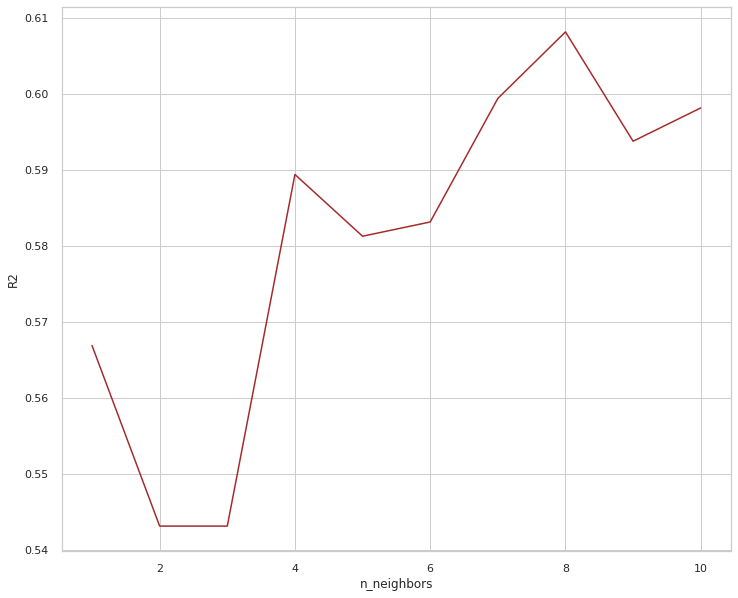

In [73]:
# Visualizacion del valor optimo de n_neighbors para llevar a una puntuación R2 más alta
plt.plot(n_neighbors_range, test_scores, color = "Brown")
plt.xlabel('n_neighbors')
plt.ylabel('R2');

In [74]:
# Revisamos los scores
scores

,train_scores,test_scores
0,1.0000,0.566875
1,0.7550,0.543125
2,0.7575,0.543125
3,0.7600,0.589375
4,0.7725,0.581250
5,0.7225,0.583125
6,0.7275,0.599375
7,0.7100,0.608125
8,0.7075,0.593750
9,0.7275,0.598125


* Este grafico esta mostrando que el mejor valor del coeficiente de determinacion se tiene utilizando un valor de k = 8, es decir 8 n_neighbor Se evaluaran las metricas mas adelante

In [75]:
# obtencion de los variables y-test y y_pred para el mejor resultado
Knn = KNeighborsClassifier(n_neighbors=8) # Instanciamiento
scaler = StandardScaler()
Knn_pipe = make_pipeline(scaler, Knn)
Knn_pipe.fit(X_train, y_train) # ajuste usando las variables de entrenamiento
Knn_y_true = list(y_test) # lista de valores reales para el modelo Tree
Knn_y_pred = list(Knn_pipe.predict(X_test)) # lista de valores predichos

In [76]:
# suma de aciertos y desaciertos
boleano=[]
cant_valores=len(Knn_y_true)
for i in range (0, cant_valores):
  boleano.append(Knn_y_true[i] == Knn_y_pred[i])
boleano_array=np.array(boleano)
aciertos=round(np.sum(boleano_array==True, axis=0)/cant_valores*100,1)
desaciertos=round(100-aciertos,1)

In [77]:
# acumulacion de resultados para la comparativa final
Resultados["Modelo"][2]="KNN Class"
Resultados["Parametro"][2]="n_neighbors"
Resultados["Numero"][2]=8
Resultados["Training Accuracy"][2]="0.71"
Resultados["Test Accuracy"][2]="0.61"
Resultados["Aciertos"][2]=str(aciertos)+"%"
Resultados["Desaciertos"][2]=str(desaciertos)+"%"

### Opcion d) Modelo de Regresion Logistica 

In [78]:
# Instanciamos el modelo
Log_Reg = LogisticRegression(random_state = 42)

In [79]:
# Instanciamoes el Standar Scaler necesario
scaler = StandardScaler()

In [80]:
# Ponemos el scaler y el modelo en un pipeline
Log_Reg_pipe = make_pipeline(scaler, Log_Reg)

In [81]:
# ajuste del modelo usando los datos de entrenamiento. 
Log_Reg_pipe.fit(X_train, y_train) # al igual que en Knn en este modelo no uso los valores escalados porque se re escalaran con un pipeline 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [82]:
# Evaluar el modelo
train_score = Log_Reg_pipe.score(X_train, y_train)
test_score = Log_Reg_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9625
0.92125


* Los coeficientes de las variables de entrenamiento y las de prueba estan bastante cercanos, esto es una indicacion que el modelo esta bien. Se analizara si es necesario ajustar con L1 o L2, con diferentes valores de hiperparametro c

In [83]:
# Que parametros uso
Log_Reg_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression', LogisticRegression(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': None,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 42,
 'logisticregression__solver': 'lbfgs',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False}

* Probamos el ajuste con L1 y diferentes valores de c

In [84]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000] # se usan estos valores por la diferencia relevante cuando la escala crece significativamente
train_scores = []
test_scores = []
for c in c_values:
  Log_Reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1') # Instanciamiento de modelo
  scaler = StandardScaler() # instamiento del Scaler
  Log_Reg_pipe = make_pipeline(scaler, Log_Reg) # instamiento del pipe line
  Log_Reg_pipe.fit(X_train, y_train) # ajuste a las variables de entrenamiento
  # acumulacion de los valores obtenido para entrenamiento y prueba
  train_scores.append(Log_Reg_pipe.score(X_train, y_train))
  test_scores.append(Log_Reg_pipe.score(X_test, y_test))

In [85]:
# Reserva de valores en un dataframe de scores
scores=pd.DataFrame()
scores["train_scores"]=list(train_scores)
scores["test_scores"]=list(test_scores)

{0.0001: 0.253125,
 0.001: 0.253125,
 0.01: 0.566875,
 0.1: 0.7525,
 1: 0.810625,
 10: 0.816875,
 100: 0.81625,
 1000: 0.8175,
 10000: 0.8175}

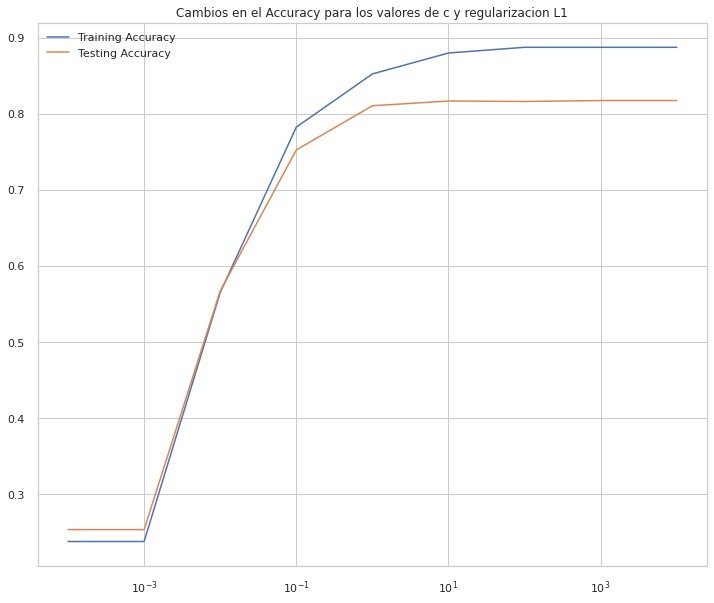

In [86]:
# visualizacion de los cambios en el ajuste con los valores de c
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Cambios en el Accuracy para los valores de c y regularizacion L1')
ax.legend()
ax.set_xscale('log')  # eje x con escala logaritmica para mostrar los intervalos de c
{c:score for c, score in zip(c_values, test_scores)} # diccionario de valores de c y los scores

In [87]:
# Revision de scores
scores

,train_scores,test_scores
0,0.2375,0.253125
1,0.2375,0.253125
2,0.5650,0.566875
3,0.7825,0.752500
4,0.8525,0.810625
5,0.8800,0.816875
6,0.8875,0.816250
7,0.8875,0.817500
8,0.8875,0.817500


**Observacion**:

Con L1 en el hiperparametro se reducen ambos coeficientes de determinacion

* Probamos el ajuste con L2 y diferentes valores de c

In [88]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
train_scores = []
test_scores = []
for c in c_values:
  Log_Reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2') # Instanciamiento de modelo
  scaler = StandardScaler() # instamiento del Scaler
  Log_Reg_pipe = make_pipeline(scaler, Log_Reg) # instanciamiento del pipe line
  Log_Reg_pipe.fit(X_train, y_train) # ajuste a las variables de entrenamiento
  # acumulacion de los valores obtenido para entrenamiento y prueba
  train_scores.append(Log_Reg_pipe.score(X_train, y_train))
  test_scores.append(Log_Reg_pipe.score(X_test, y_test))

In [89]:
# Reserva de valores en un dataframe de scores
scores=pd.DataFrame()
scores["train_scores"]=list(train_scores)
scores["test_scores"]=list(test_scores)

{0.0001: 0.596875,
 0.001: 0.6,
 0.01: 0.61125,
 0.1: 0.69,
 1: 0.769375,
 10: 0.805625,
 100: 0.811875,
 1000: 0.8175,
 10000: 0.8175}

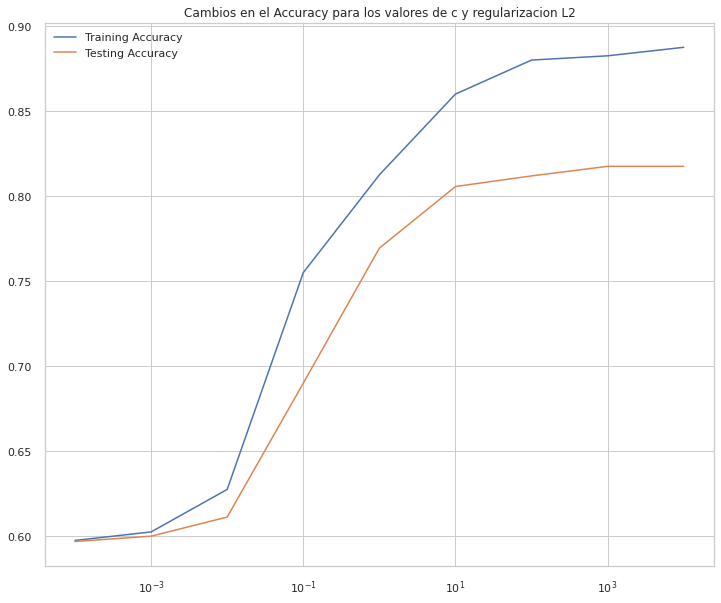

In [90]:
# visualizacion de los cambios en el ajuste con los valores de c
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Cambios en el Accuracy para los valores de c y regularizacion L2')
ax.legend()
ax.set_xscale('log')  # eje x con escala logaritmica para mostrar los intervalos de c
{c:score for c, score in zip(c_values, test_scores)} # diccionario de valores de c y los scores

In [91]:
# Revision de scores
scores

,train_scores,test_scores
0,0.5975,0.596875
1,0.6025,0.600000
2,0.6275,0.611250
3,0.7550,0.690000
4,0.8125,0.769375
5,0.8600,0.805625
6,0.8800,0.811875
7,0.8825,0.817500
8,0.8875,0.817500


**Observacion**:

* Con L2 en el hiperparametro tambien se reducen ambos coeficientes de determinacion

* Ni la regularización con L1 ni con la L2 se mejoro los coeficeintes de determinacion obtenidos con los parametros por defecto por los que las predicciones se trabajaran segun los resultados del modelo con los hiperparametros por defecto y con los resultados de 0.96 y 0.92 para los coeficientes de determinacion

In [92]:
# obtencion de los variables y-test y y_pred para el mejor resultado
Log_Reg = LogisticRegression(random_state = 42) # instanciamiento del modelo
scaler = StandardScaler() # instamiento del Scaler
Log_Reg_pipe = make_pipeline(scaler, Log_Reg) # instanciamiento del pipe line
Log_Reg_pipe.fit(X_train, y_train) # ajuste a las variables de entrenamiento
Log_y_true = list(y_test) # lista de valores reales para el modelo Tree
Log_y_pred = list(Log_Reg_pipe.predict(X_test)) # lista de valores predichos

In [93]:
# suma de aciertos y desaciertos
boleano=[]
cant_valores=len(Log_y_true)
for i in range (0, cant_valores):
  boleano.append(Log_y_true[i] == Log_y_pred[i])
boleano_array=np.array(boleano)
aciertos=round(np.sum(boleano_array==True, axis=0)/cant_valores*100,1)
desaciertos=round(100-aciertos,1)

In [94]:
Resultados["Modelo"][3]="Regresion Logistica"
Resultados["Parametro"][3]="c"
Resultados["Numero"][3]=1
Resultados["Training Accuracy"][3]="0.96"
Resultados["Test Accuracy"][3]="0.92"
Resultados["Aciertos"][3]=str(aciertos)+"%"
Resultados["Desaciertos"][3]=str(desaciertos)+"%"

### Comparativo de metricas

* Revision de resultados de parametros y scores de cada modelo

In [95]:
Resultados

,Modelo,Parametro,Numero,Training Accuracy,Test Accuracy,Aciertos,Desaciertos
0,Decission Tree,max_depth,4,0.87,0.80,79.0%,21.0%
1,Bagged Tree,n_estimators,10,1.00,0.84,77.4%,22.6%
2,KNN Class,n_neighbors,8,0.71,0.61,60.8%,39.2%
3,Regresion Logistica,c,1,0.96,0.92,92.1%,7.9%


* Visualizacion de resultados

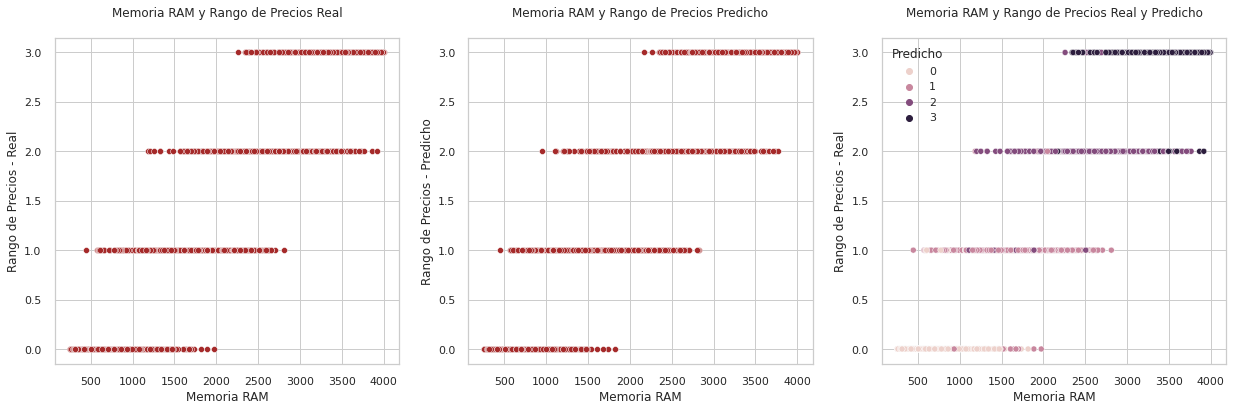

In [96]:
# Memoria RAM vs. Precios con valores real y predichos
ejex=X_test.loc[:,'ram'] # los datos a graficar en eje x
datos = list(zip(ejex, Log_y_true, Log_y_pred)) # los datos del eje x, eje y y color en una sola lista
datos_df = pd.DataFrame(datos, columns = ["Memoria RAM", "Rango de Precios - Real", "Predicho"]) # convertimos en un dataframe para el scatterplot
plt.figure(figsize=(21,6))
# Subplot 1
plt.subplot(1, 3, 1);
plt.title('Memoria RAM y Rango de Precios Real\n', fontsize = 12);
sns.scatterplot(data = datos_df, x="Memoria RAM", y="Rango de Precios - Real", color="brown");
# Subplot 2
plt.subplot(1, 3, 2);
plt.title('Memoria RAM y Rango de Precios Predicho\n', fontsize = 12);
plt.ylabel("Rango de Precios - Predicho", fontsize = 12)
sns.scatterplot(data = datos_df, x="Memoria RAM", y="Predicho", color="brown");
# Subplot 3
plt.subplot(1, 3, 3);
plt.title('Memoria RAM y Rango de Precios Real y Predicho\n', fontsize = 12);
sns.scatterplot(data = datos_df, x="Memoria RAM", y="Rango de Precios - Real", hue="Predicho");
plt.show()

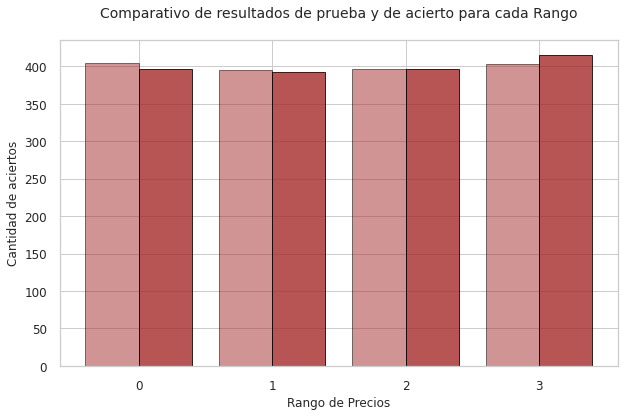

In [97]:
# Visualizacion de valores verdaderos de las y-real e y-pred
sum_real=datos_df['Rango de Precios - Real'].value_counts().sort_index(ascending=True)
sum_pred=datos_df['Predicho'].value_counts().sort_index(ascending=True)
x=np.array(range(4))
labels=["Real", "Predicho"]
width=0.4
plt.figure(figsize=(10,6))
plt.ticklabel_format(useOffset=False, style='plain')  # quitamos la notacion cientifica inicial
plt.title('Comparativo de resultados de prueba y de acierto para cada Rango\n', fontsize = 14)
plt.xlabel("Rango de Precios", fontsize = 12)
plt.ylabel("Cantidad de aciertos", fontsize = 12)
plt.bar(x-width/2, sum_real, width=width, align='center', alpha=0.5, color='brown', label="Real", edgecolor="black")
plt.bar(x+width/2, sum_pred, width=width, align='center', alpha=0.8, color='brown', label="Predicho", edgecolor="black")
plt.xticks(x, fontsize = 12, rotation = 0)
plt.yticks(fontsize = 12)
plt.show()

## Conclusiones a Parte 4

Evaluados los cuatro modelos, por los resultados obtenidos, se recomienda el modelo de Regresion Logistica para ser utilizado para este caso, por presentar los coeficientes de determinacion mas altos de 0.96 y 0.92, para las variables de entrenamiento y de prueba respectivamente y el porcentaje mas alto de acietos que presenta de las predicciones con respecto a los valores reales, con 92.1%.

Para la visualizacion de resultados, tomamos la variable RAM que presento la mayor correlacion con la variable Rango de Precios y se observa el buen ajuste de ambos valores reales y predichos sobre la variable objetivo, apareciendo los colores de los desaciertos correspondientes en cada rango.

Igualmente se grafico por cada rango de precios el comparativo de los resultados de prueba y los aciertos de las predicciones evidenciando su cercano a los valores reales

# PARTE 5

Para la tarea de esta semana, tu presentación debe incluir:

Una breve introducción a tus datos y a tu problema de aprendizaje automático.
Al menos dos visualizaciones que demuestren los resultados importantes a partir de de tus análisis de tu conjunto de datos. Estas visualizaciones deben ser calidad informativa.  Asegúrate de explicar los resultados asociados con cada imagen.  
El modelo de producción que elegiste para utilizar para abordar tu problema de aprendizaje automático.
Una breve descripción de la evaluación del modelo y lo que signifca para aplicar el modelo.
Recomendaciones finales basadas en tus análisis.
Tu tarea para esta semana es completar tu proyecto y preparar tu presentación.

## Solucion a Parte 5

**Ver: [Proyecto 2 - Presentacion Final](https://github.com/jcpalaciosb/Clasificacion_de_Precios/blob/main/Proyecto%202%20-%20Presentacion%20Final.pptx)**

#Conclusiones Finales

* Las data trabajada cuenta con dos mil observaciones de veintiún características o funciones internas y externas de los teléfonos móviles,  de las cuales solo once características mostraron guardar una correlación entre ellas.

* La variable objetivo “Rango de Precios”, esta compuesta por cuatro grupos enumerados del 0 al 3 y contiene información balanceada para cada uno de estos cuatro grupos con 500 observaciones para cada uno. 

* Del análisis efectuados sobre cada característica respecto a cada grupo se observa un diferenciación por las funciones internas Batería, Pixeles Alto y Ancho y Memoria RAM evidenciando esta última mucha incidencia en el rango de precios.

* Se eligieron cuatro modelos de clasificación para evaluar resultados de los mismos, utilizando las once características seleccionadas: Decission Tree, Bagged Tree, KNN y Logistic Regresión, encontrando en es ultimo los mejores resultados para la predicción de los valores de la variables rango de precios.


# Referencias

* [Kraggle](https://www.kaggle.com/)
* [IArtificial.net](https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/)
* [Classification Models](https://github.com/fralfaro/CodingDojo-DataScience/blob/main/docs/6-RegressionModels/2-RegressionModels.ipynb)
* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Visualizaciones](file:///C:/Users/dpala/Documents/Coding_dojo-data-science/Python_intro/Los_fundamentos/Visualizacion.pdf)
* [Plataforma Coding Dojo]()
* [Numpy](https://numpy.org/)
* [Pandas](https://pandas.pydata.org/)
* [Matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)
* [Seaborn](https://seaborn.pydata.org/)
